# Reat Estate Property Clustering 

## Problem Statement

Finding the right house is often a long, stressful, and tedious process. However, online system and e-real state makes it easier by giving customer details and unique insights on the homes they’re interested in. Real Estate systems have been expanded recently, generally each company built its own website to advertise its products and perform online buying and selling. Therefore, consumers can get lost in searching among those all websites and it became more conflict and time consuming. For that reason, building a common platform where people can compare various properties and their features and can get similar recommendation would be very helpful for consumers. 

Here, we will try to cluster the listed properties into natural clusters and see if this groups are similar or different. We will analyse these groups and brainstorm about how this info can be utlised to make a good recommendation to a user.




## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

    4.1 - Data Types and Summary Statistics

    4.2 - Missing Values

    4.3 - Univariate Analysis

    4.4 - Bivariate Analysis

    4.5 - Data Preparation

5. K-means Clustering

6. Cluster Profliling

## Optional

7. PCA 

## 1. Import necessary libraries

In [1]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## 2. Setting Options

In [2]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data and Display top 5 samples

In [3]:
df = pd.read_csv("property.csv")

In [4]:
df.head(5)

,item_id,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,91c0e569-bddd-4128-9720-2550bb85580e,64800000.0000000,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0000000,42,False,3.0000000,0.0000000,True,23.0000000
1,b00b7919-06be-4d26-98b8-1971787e1d46,72000000.0000000,4320000,97c9535e-3985-47ce-a84c-a962c838a76b,2.0000000,116,True,nan,1.0000000,True,16.0000000
2,9eddb6bc-e424-4774-b55f-bfd54366d627,50400000.0000000,1440000,b790f536-c274-4147-86e0-94d9b6d7352d,1.0000000,74,False,2.0000000,0.0000000,True,19.0000000
3,12cf6b07-5d56-4126-94d2-ce9cbfe2214f,36000000.0000000,864000,93d06676-4975-4cc5-919b-3a0c29c7ad43,1.0000000,60,True,nan,2.0000000,False,6.0000000
4,929eb20c-3694-46b2-b96c-91117b995d1b,28800000.0000000,1296000,58e59fa9-9947-478f-9cef-bc6a2cbe49a9,1.0000000,45,True,nan,1.0000000,True,4.0000000


- item_id and district_uuid are the ids column and we dont require them for analysis.
- has_elevator and has_storage_area are boolean column which can be encoded in 0 & 1 for numerical analysis.

## 4.  Data Analysis and Preparation

### 4.1  Check dimensions of the dataframe in terms of rows and columns

In [5]:
df.shape

(4930, 11)

### 4.2 Check data types and info of the dataframe. Mention your inferences out ouf this info

In [6]:
df.dtypes

item_id                  object
deposit                 float64
monthly_rent              int64
district_uuid            object
room_qty                float64
unit_area                 int64
has_elevator             object
building_floor_count    float64
unit_floor              float64
has_storage_area         object
property_age            float64
dtype: object

- Continuous: deposit, monthly_rent, unit_area, property_age
- Discrete: room_qty, has_elevator, has_storage, building_floor_count, unit_floor
- object: item_id, district_uuid

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
item_id                 4930 non-null object
deposit                 4925 non-null float64
monthly_rent            4930 non-null int64
district_uuid           4929 non-null object
room_qty                4927 non-null float64
unit_area               4930 non-null int64
has_elevator            4913 non-null object
building_floor_count    3282 non-null float64
unit_floor              4893 non-null float64
has_storage_area        4920 non-null object
property_age            4926 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 423.8+ KB


### 4.3 Drop unnecessary columns

In [8]:
df = df.drop('item_id', axis =1)

In [9]:
df.shape

(4930, 10)

### 4.4 Check summary statistics for both continuous and discrete variables and write your findings

In [10]:
df.describe()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age
count,4925.0000000,4930.0000000,4927.0000000,4930.0000000,3282.0000000,4893.0000000,4926.0000000
mean,83212835.5736041,1052041.2170385,1.4718896,71.6533469,3.9707495,2.4171265,13.6510353
std,52899405.3371245,3797125.2210949,0.5794310,22.8908893,1.2806667,3.4962205,8.4839308
min,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,-2.0000000,0.0000000
25%,43200000.0000000,0.0000000,1.0000000,55.0000000,3.0000000,1.0000000,8.0000000
50%,72000000.0000000,720000.0000000,1.0000000,67.0000000,4.0000000,2.0000000,14.0000000
75%,108000000.0000000,1440000.0000000,2.0000000,84.0000000,4.0000000,3.0000000,18.0000000
max,432000000.0000000,144000000.0000000,5.0000000,263.0000000,16.0000000,225.0000000,99.0000000


In [11]:
df.describe(include = 'O')

,district_uuid,has_elevator,has_storage_area
count,4929,4913,4920
unique,160,2,2
top,b790f536-c274-4147-86e0-94d9b6d7352d,False,True
freq,428,3188,3212


- item_id is just a refrence for the properties listed, we can drop that as we have index also for refrencing them.
- district_uuid is also just an id for district but as there are only 160 id's, it can mean that we have 160 district data, we are just having that column so that we can infer if something meaningfull can be extracted from this column.
- monthly_rent have 25% values as 0, we will take a look as to what is there for us.
- also there are negative values in unit_floor column which can be imputed.
- We can standardize values as they are of different scales.

### 4.5 Check for missing values

In [12]:
df.isna().sum()

deposit                    5
monthly_rent               0
district_uuid              1
room_qty                   3
unit_area                  0
has_elevator              17
building_floor_count    1648
unit_floor                37
has_storage_area          10
property_age               4
dtype: int64

In [13]:
df['building_floor_count'].isna().sum()/df.shape[0]

0.33427991886409736

## 5. Univariate Analysis

### 5.1.1 Plot distribution for 'deposit' using an appropriate plot

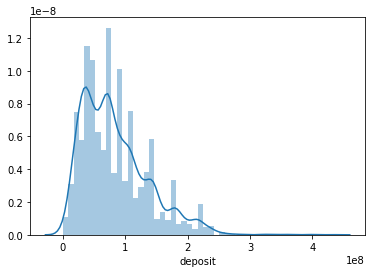

In [14]:
sns.distplot(df['deposit'].dropna())

In [15]:
df.shape

(4930, 10)

- We can infer that deposit column is right skewed.

### 5.1.2 Print samples having deposit as 0 and drop them

In [16]:
df[df['deposit']==0]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
1779,0.0000000,144000000,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,2.0000000,89,False,nan,3.0000000,True,22.0000000
2447,0.0000000,0,991229e4-506e-48d6-942d-306001bb240c,2.0000000,63,False,nan,3.0000000,False,15.0000000
2864,0.0000000,1440000,9113051b-540b-42b0-94ee-2542e800d071,0.0000000,53,False,nan,1.0000000,False,11.0000000
3239,0.0000000,72000000,3ac48cb3-a697-4d94-a97c-3055f1ad4790,1.0000000,53,False,nan,nan,True,16.0000000
3271,0.0000000,0,289470b4-d669-4ef3-803b-b6250a4b966c,1.0000000,1,False,12.0000000,nan,False,1.0000000
3468,0.0000000,0,ceeac06a-a89d-4934-98a8-e6183ef0a0e9,0.0000000,0,False,nan,0.0000000,False,0.0000000
3801,0.0000000,0,22604b8e-4463-48ee-bc27-c45c85758fa5,0.0000000,0,False,4.0000000,4.0000000,False,0.0000000
4720,0.0000000,144000000,1c10c124-59c8-4f0f-954d-1b1993c1c01b,2.0000000,75,False,nan,4.0000000,True,19.0000000


In [17]:
df = df[df['deposit']!=0]

In [18]:
df.shape

(4922, 10)

- After dropping columns, we are left with 4922 columns as there are only 8 rows having 0 as deposit.

### 5.1.3 Check for samples having null deposit

In [19]:
df[(df['deposit'].isna()) & (df['monthly_rent']==0)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
483,nan,0,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,1.0000000,62,True,5.0000000,2.0000000,True,3.0000000
2914,nan,0,75e0f54e-3d91-4c74-8aba-e525ec3c1a96,nan,63,NaN,nan,3.0000000,NaN,nan
4155,nan,0,3407b7ba-a275-4ab7-bc13-28b08a54c028,2.0000000,119,True,6.0000000,6.0000000,True,0.0000000


In [20]:
df = df[~((df.deposit.isnull()) & (df.monthly_rent == 0))]

In [21]:
df.shape

(4919, 10)

In [22]:
df[df['deposit'].isna()]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
469,nan,4320000,0463c357-b4ef-49ed-9327-fcba2397ef6d,1.0000000,74,False,3.0000000,0.0000000,True,18.0000000
2838,nan,2520000,e15378f5-652b-4c49-9c25-6e9f8414d5e7,1.0000000,53,False,3.0000000,0.0000000,False,19.0000000


- We are imputing rows which have nan as deposit and 0 as monthly rent.
- We are not removing nan values for deposit which have monthly rent populated.

### 5.2.1 Check distribution for monthly_rent

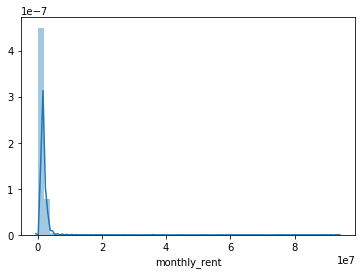

In [23]:
sns.distplot(df['monthly_rent'])

- Highly right skewed, moreover data for monthly rent column have most values centered around 0.

### 5.2.2 Check the count of samples having zero monthly rent. Discuss on how we should deal with these values

In [24]:
df[(df['monthly_rent'] == 0)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
0,64800000.0000000,0,263682f6-d0cd-4569-aeec-e727b76b7665,1.0000000,42,False,3.0000000,0.0000000,True,23.0000000
5,122400000.0000000,0,93d06676-4975-4cc5-919b-3a0c29c7ad43,2.0000000,86,True,nan,5.0000000,False,5.0000000
6,61920000.0000000,0,402a922d-d082-4d13-8266-2bad33cb537c,1.0000000,58,False,nan,0.0000000,False,25.0000000
9,86400000.0000000,0,c17ec6fb-7428-4620-b0f3-e23f36513c85,1.0000000,42,True,4.0000000,1.0000000,True,0.0000000
12,216000000.0000000,0,a655e097-ec60-4b2c-9187-91232457b4a3,2.0000000,79,True,5.0000000,4.0000000,True,13.0000000
14,151200000.0000000,0,1c10c124-59c8-4f0f-954d-1b1993c1c01b,1.0000000,64,False,4.0000000,2.0000000,True,16.0000000
15,136800000.0000000,0,c2ab0a0e-c71b-4218-90db-16095a39983e,2.0000000,63,True,5.0000000,3.0000000,True,8.0000000
20,144000000.0000000,0,9113051b-540b-42b0-94ee-2542e800d071,2.0000000,89,True,nan,0.0000000,True,0.0000000
22,133200000.0000000,0,50bd01d5-394d-4adc-ada6-17ce262e0f73,2.0000000,87,False,2.0000000,2.0000000,True,25.0000000
27,79200000.0000000,0,75e0f54e-3d91-4c74-8aba-e525ec3c1a96,1.0000000,68,True,8.0000000,3.0000000,True,11.0000000


### 5.3.1 Check distribution of unit_area

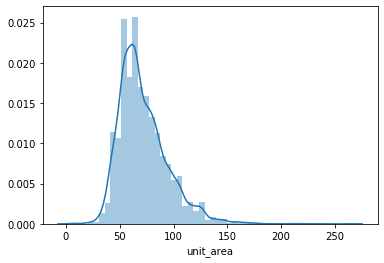

In [25]:
sns.distplot(df['unit_area'])

- Unit Area column is little rightly skewed.

### 5.3.1 Check samples having unit_area greater than 200 and less than 20. Discuss is they are valid or noise

In [26]:
df[(df['unit_area'] >200)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
133,237600000.0000000,0,6cce06a4-9f72-42b6-abdc-52374d2c2428,3.0000000,210,False,4.0000000,4.0000000,True,16.0000000
556,201600000.0000000,0,7c106410-1abe-4ddd-987b-bc1302f74827,4.0000000,263,False,nan,1.0000000,True,30.0000000
562,36000000.0000000,4320000,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,3.0000000,210,False,2.0000000,2.0000000,True,15.0000000
2921,432000000.0000000,3600000,03331262-b194-4c33-93c8-36b2c34129c8,3.0000000,221,False,3.0000000,1.0000000,True,25.0000000


In [27]:
df[(df['unit_area'] <20)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
456,10800000.0000000,612000,411b7df0-bba0-4288-a1a8-7604606bb21a,0.0000000,16,False,4.0000000,4.0000000,False,5.0000000
479,36000000.0000000,1440000,fa5ca36c-38d1-435c-9e07-d2c224030ac2,1.0000000,5,False,nan,1.0000000,False,10.0000000
2397,3600000.0000000,612000,ee38804f-d4f3-489e-840a-9bcedbb534fb,1.0000000,6,False,nan,1.0000000,False,25.0000000
4872,57600000.0000000,1800000,340fb2dc-2d83-44b2-9140-0451bdae3b17,2.0000000,8,False,nan,4.0000000,True,14.0000000


- These values are legitimate, we will carry them forward for clustering.

### 5.4.1  Check distribution of property_age

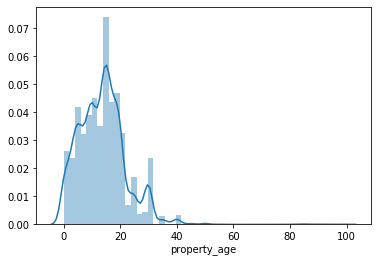

In [28]:
sns.distplot(df['property_age'].dropna())

- Property age is right skewed.

### 5.4.2 Check samples having property_age greater than 50. Discuss is they are valid or noise

In [29]:
df[(df['property_age'] >50)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
377,230400000.0000000,0,acabe5ae-3b3b-440d-ba23-4361baa18b37,2.0000000,84,False,4.0000000,3.0000000,True,99.0000000
794,21600000.0000000,1800000,0ffe3572-e03a-46d7-9ae3-3e50ed19e6c4,1.0000000,58,False,4.0000000,4.0000000,True,86.0000000
985,36000000.0000000,1224000,fa5ca36c-38d1-435c-9e07-d2c224030ac2,1.0000000,50,False,nan,4.0000000,False,81.0000000
1010,21600000.0000000,864000,30680871-7d7b-49a0-8946-ede2df725fcd,1.0000000,38,False,nan,2.0000000,False,85.0000000
2423,36000000.0000000,1512000,f9659f99-06e9-4f58-8402-3138acb47923,1.0000000,63,False,nan,1.0000000,True,83.0000000
2774,18000000.0000000,1224000,97780d3b-5100-46f7-a005-e06862d0e083,1.0000000,42,False,3.0000000,2.0000000,False,89.0000000
4166,7200000.0000000,684000,ca37c778-f641-43fe-85d3-42b7284fc673,1.0000000,43,False,2.0000000,1.0000000,False,55.0000000


- Data volume is not noisy, we will not impute these intead use them for clustering. 

### 5.5.1 Check distribution of unit_floor

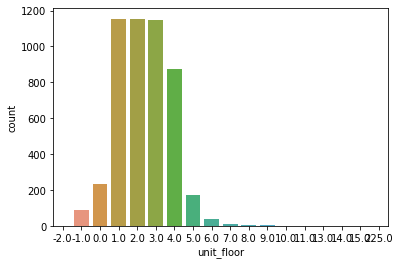

In [30]:
sns.countplot(df['unit_floor'].dropna())

- We have more values for unit_floor 1,2,3. Comparing with all other unit_floor available in dataset.

### 5.5.2 Check for outlier value and impute it

In [31]:
df[(df['unit_floor'] >10)]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
799,72000000.0000000,2160000,411b7df0-bba0-4288-a1a8-7604606bb21a,1.0000000,67,True,16.0000000,15.0000000,True,5.0000000
1206,194400000.0000000,0,be019b67-eea9-447a-a0a6-f3ced86122ab,2.0000000,100,True,nan,11.0000000,True,3.0000000
3113,108000000.0000000,3240000,6cce06a4-9f72-42b6-abdc-52374d2c2428,3.0000000,137,True,13.0000000,13.0000000,True,9.0000000
3422,144000000.0000000,2160000,a655e097-ec60-4b2c-9187-91232457b4a3,2.0000000,69,True,nan,225.0000000,True,0.0000000
3502,252000000.0000000,0,411b7df0-bba0-4288-a1a8-7604606bb21a,2.0000000,108,True,16.0000000,14.0000000,True,0.0000000


In [32]:
df.shape

(4919, 10)

In [33]:
df = df[df['unit_floor']!=225]

In [34]:
df.shape

(4918, 10)

- We are imputing row having unit_floor count as 225, as we can see that it is an outlier.

### 5.5.2 Check for null values for unit_floor and impute them

In [35]:
df[df['unit_floor'].isnull()]

,deposit,monthly_rent,district_uuid,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
78,144000000.0000000,0,eb88325f-5388-4cf5-99ad-3c6295a105e9,2.0000000,84,True,nan,nan,False,7.0000000
222,100800000.0000000,0,fa5ca36c-38d1-435c-9e07-d2c224030ac2,1.0000000,68,True,nan,nan,False,4.0000000
609,18000000.0000000,1800000,17476519-9089-40df-a613-4ae293d34607,1.0000000,62,False,nan,nan,True,9.0000000
763,7200000.0000000,1440000,57808ddf-b5d8-4a1b-a90c-90f9fd4fa5d3,1.0000000,53,False,nan,nan,True,17.0000000
1101,36000000.0000000,1800000,340fb2dc-2d83-44b2-9140-0451bdae3b17,1.0000000,66,False,nan,nan,True,20.0000000
1207,72000000.0000000,1080000,fd5ad07f-14b2-4491-aeb3-31651e92e1fd,1.0000000,79,False,nan,nan,False,3.0000000
1417,72000000.0000000,0,53abf70b-ee3b-4ecd-bf69-4ab9dcfa65bb,2.0000000,89,True,nan,nan,True,4.0000000
1739,14400000.0000000,1656000,c17ec6fb-7428-4620-b0f3-e23f36513c85,1.0000000,70,False,nan,nan,True,15.0000000
1777,63360000.0000000,0,d08dcedb-4fa8-4a12-8e8e-59686103f5c2,1.0000000,42,False,nan,nan,False,40.0000000
1940,36000000.0000000,3240000,263682f6-d0cd-4569-aeec-e727b76b7665,2.0000000,194,True,nan,nan,False,12.0000000


In [36]:
df['unit_floor'].isnull().sum()

35

- We are replacing all the null values with mode of the unit_floor column.

In [37]:
df['unit_floor'].fillna(df['unit_floor'].mode()[0],inplace = True)

In [38]:
df['unit_floor'].isnull().sum()

0

In [39]:
df.shape

(4918, 10)

### 5.6.1 Check frequency distribution of  room_qty and comment on it

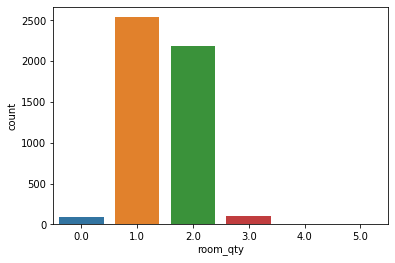

In [40]:
sns.countplot(df['room_qty'])

In [41]:
df[(df['room_qty']==0)].shape

(86, 10)

- We have considerate amount of data with room_qty as 0.

### 5.7.1 Check frequency distribution of "has_storage_area" and "has_elevator"

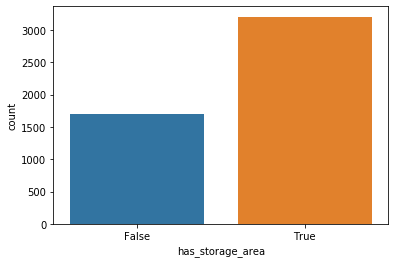

In [42]:
sns.countplot(df['has_storage_area'])

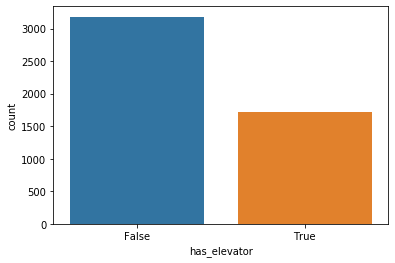

In [43]:
sns.countplot(df['has_elevator'])

- Most of the houses have storage area but only a few have elevators in it. 

### 5.8.1 Check the frequency count for building_floor_count

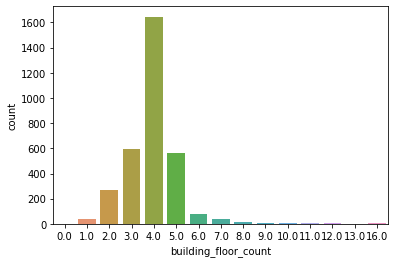

In [44]:
sns.countplot(df['building_floor_count'])

In [45]:
df[(df['building_floor_count']>10)].shape

(15, 10)

- Most of the buildings are having 4 floors.
- There are only 15 buildings greater than 10 building floor count.

### 5.8.1 Check null samples for building_floor_count. Discuss on approach to imput these null values

In [46]:
df['building_floor_count'].isna().sum()

1640

In [47]:
df['building_floor_count'].isna().sum() / df.shape[0]

0.33346888979259864

- around 33% rows are null in building_floor_count.

### 5.8.2 Replace null 'building_floor_count' with 'unit_floor' wherever 'unit_floor' is greater than 0 and replace it with mode if 'unit_floor' is 0

In [48]:
df[['building_floor_count','unit_floor']]

,building_floor_count,unit_floor
0,3.0000000,0.0000000
1,nan,1.0000000
2,2.0000000,0.0000000
3,nan,2.0000000
4,nan,1.0000000
5,nan,5.0000000
6,nan,0.0000000
7,3.0000000,2.0000000
8,2.0000000,2.0000000
9,4.0000000,1.0000000


In [49]:
df['building_floor_count'] = df.apply(lambda i: i['unit_floor'] if np.isnan(i['building_floor_count']) and i['unit_floor']>0 
                            else( 4 if np.isnan(i['building_floor_count']) and i['unit_floor']==0
                            else i['building_floor_count']), axis=1 )

In [50]:
df[['building_floor_count','unit_floor']]

,building_floor_count,unit_floor
0,3.0000000,0.0000000
1,1.0000000,1.0000000
2,2.0000000,0.0000000
3,2.0000000,2.0000000
4,1.0000000,1.0000000
5,5.0000000,5.0000000
6,4.0000000,0.0000000
7,3.0000000,2.0000000
8,2.0000000,2.0000000
9,4.0000000,1.0000000


In [51]:
df = df.drop('district_uuid', axis =1)
df.sample()

,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age
766,36000000.0000000,792000,1.0000000,47,False,2.0000000,2.0000000,False,14.0000000


- We are dropping district_uuid column.

### 5.9.1 Apply One Hot Encoding for 'has_elevator' and 'has_storage_area" 

In [52]:
df_final = pd.get_dummies(df, drop_first= True)

- Added dummies for each categorical column.

### 5.10.1 Check for missing values in the dataframe and replace it with an appropriate value

In [53]:
df_final.isna().sum()

deposit                  2
monthly_rent             0
room_qty                 2
unit_area                0
building_floor_count     0
unit_floor               0
property_age             3
has_elevator_True        0
has_storage_area_True    0
dtype: int64

In [54]:
df_final = df_final.fillna(df_final.mean())

In [55]:
df_final.isna().sum()

deposit                  0
monthly_rent             0
room_qty                 0
unit_area                0
building_floor_count     0
unit_floor               0
property_age             0
has_elevator_True        0
has_storage_area_True    0
dtype: int64

- As we are having only 7 values which are null , we will treat them.
- We will fill them using the mean value for that same column.

## 6. Bivariate Analysis

### 6.1 Check correlation and plot a heatmap and write your observations

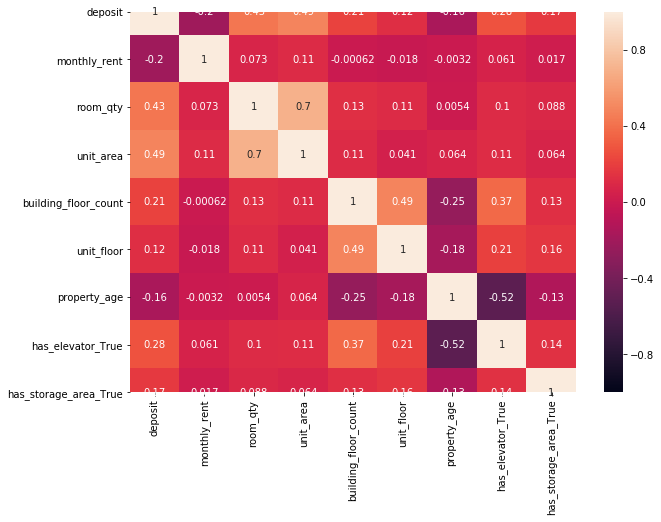

In [56]:
cor = df_final.corr()
plt.figure(figsize = (10,7))
sns.heatmap(cor, vmax =1.0, vmin = -1.0, annot = True, annot_kws={"size": 10})

- Deposit column is strongly co-related with room_qty and unit_area.
- Monthly rent is not strongly co-related with any of the variable.
- Room_qty and unit_area is highly co-related and also we can see them practically. More the rooms more the area required.
- Building floor count is positively co-related with unit floor, has_elevator. It is negatively co-related with propert_age.
- Property age and has_elevator is strongly negative corelated.

### 6.2 Plot a pairplot and write your findings

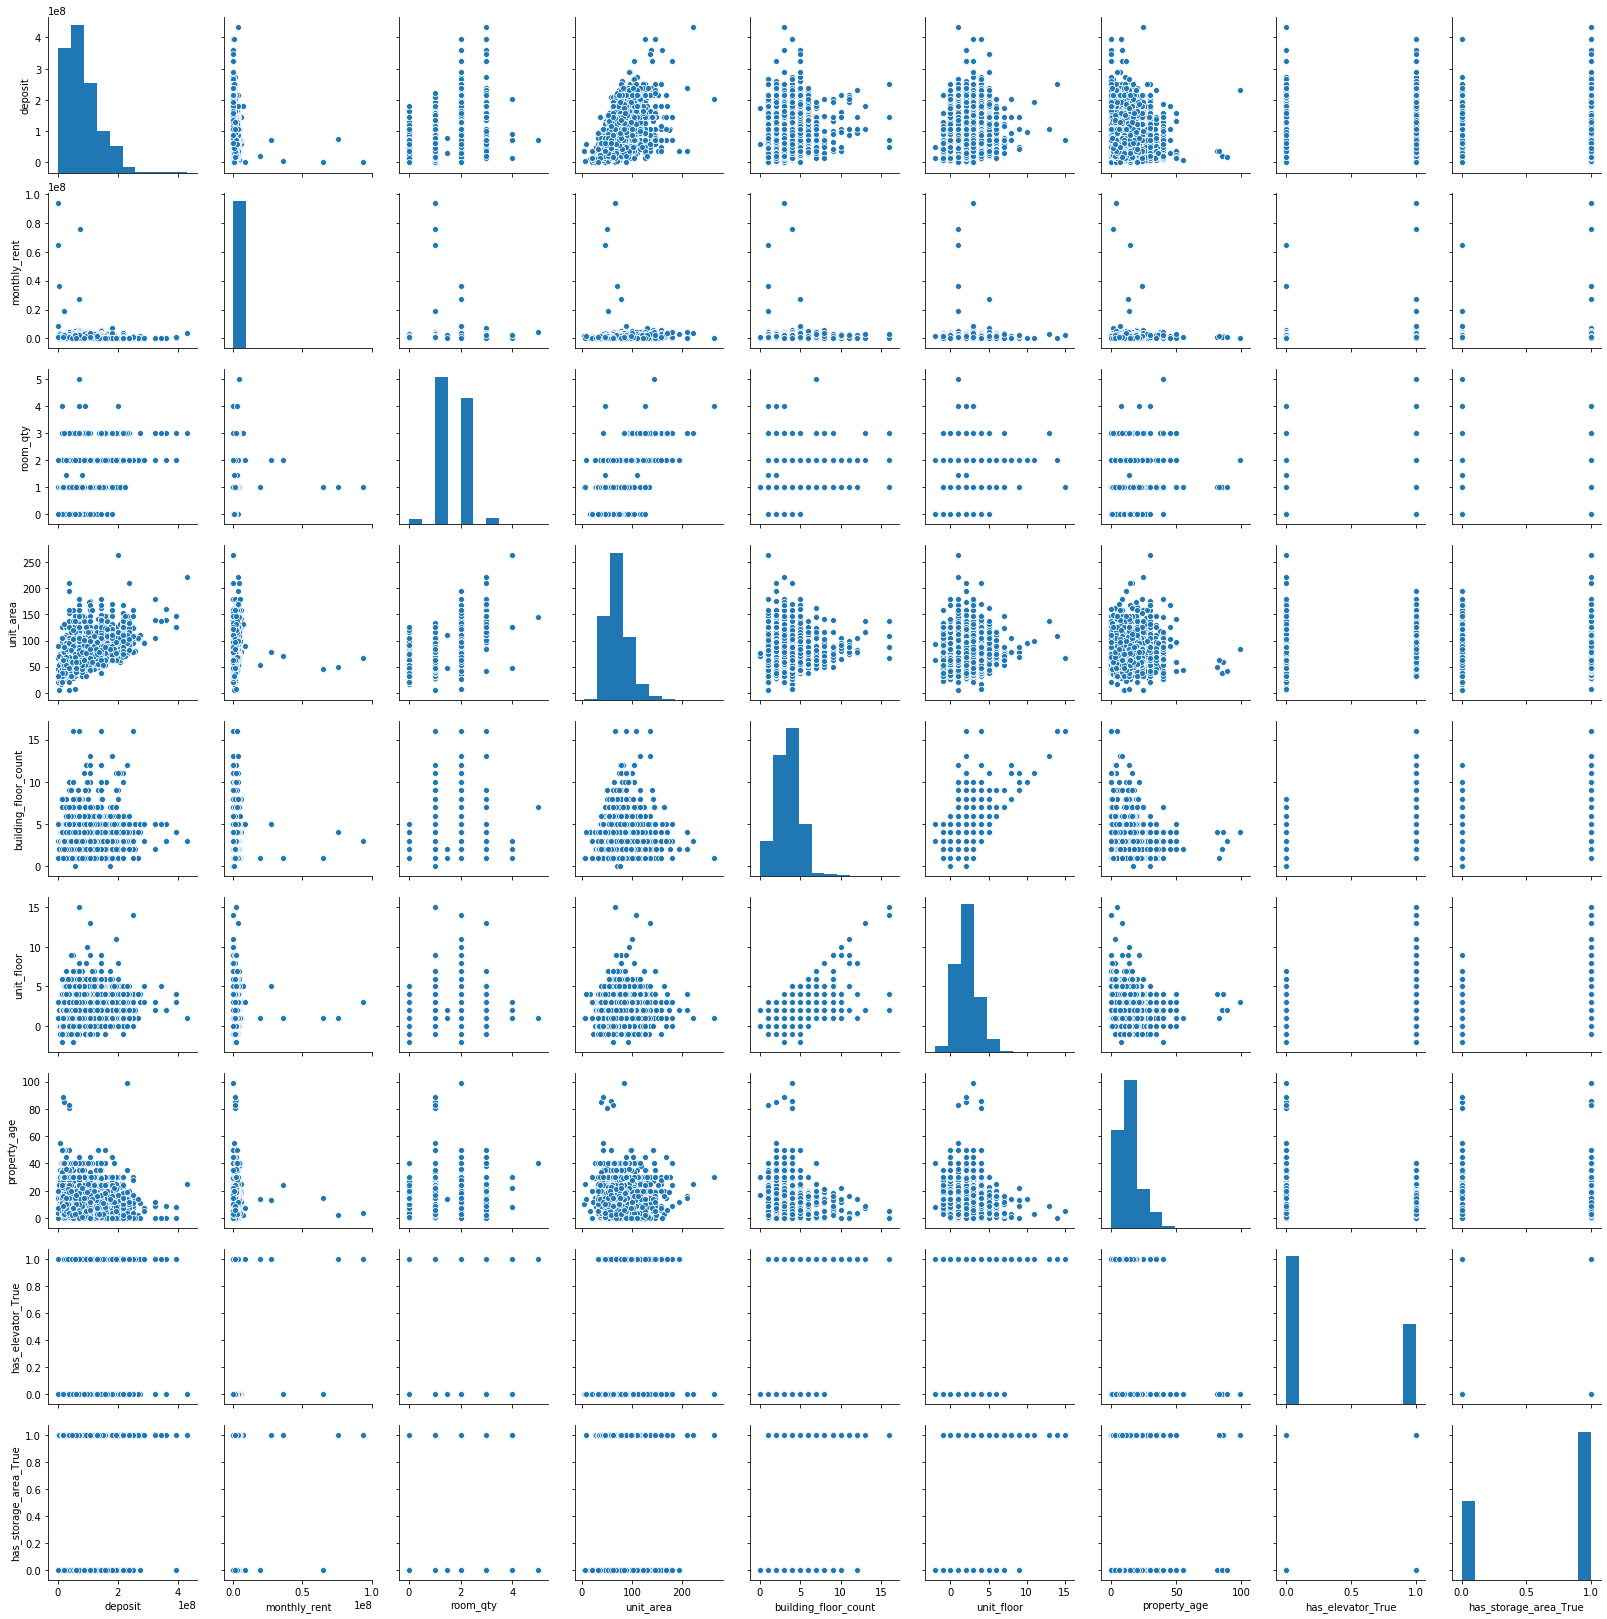

In [57]:
sns.pairplot(df_final)

## 7. Data Preparation

### 7.1 Standardize the dataset

In [58]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data = sc.fit_transform(df_final)
data = pd.DataFrame(data, columns= df_final.columns)
data.head()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True
0,-0.3509395,-0.4338245,-0.8169773,-1.3005980,-0.3425742,-1.6425465,1.1014250,-0.7340289,0.7307522
1,-0.2146220,1.4772270,0.9119338,1.9403175,-1.7286541,-0.9489140,0.2756023,1.3623441,0.7307522
2,-0.6235743,0.2031927,-0.8169773,0.1008790,-1.0356142,-1.6425465,0.6295263,-0.7340289,0.7307522
3,-0.8962091,-0.0516142,-0.8169773,-0.5122672,-1.0356142,-0.2552816,-0.9041445,1.3623441,-1.3684530
4,-1.0325265,0.1394910,-0.8169773,-1.1692095,-1.7286541,-0.9489140,-1.1400938,1.3623441,0.7307522


In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer 


column_trans = ColumnTransformer([('scaler', StandardScaler(),['deposit', 'monthly_rent', 'room_qty', 'unit_area',
       'building_floor_count', 'unit_floor', 'property_age'])], remainder='passthrough') 

data = column_trans.fit_transform(df_final)

data = pd.DataFrame(data, columns= df_final.columns)
data.head()

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True
0,-0.3509395,-0.4338245,-0.8169773,-1.3005980,-0.3425742,-1.6425465,1.1014250,0.0000000,1.0000000
1,-0.2146220,1.4772270,0.9119338,1.9403175,-1.7286541,-0.9489140,0.2756023,1.0000000,1.0000000
2,-0.6235743,0.2031927,-0.8169773,0.1008790,-1.0356142,-1.6425465,0.6295263,0.0000000,1.0000000
3,-0.8962091,-0.0516142,-0.8169773,-0.5122672,-1.0356142,-0.2552816,-0.9041445,1.0000000,0.0000000
4,-1.0325265,0.1394910,-0.8169773,-1.1692095,-1.7286541,-0.9489140,-1.1400938,1.0000000,1.0000000


## 8. K Means Clustering

### 8.1 Apply K-means on the scaled data. Try it with multiple K values ( K = 1 to 15) and plot a elbow plot between inertia and K value.

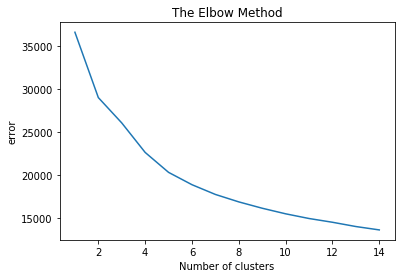

In [60]:
from sklearn.cluster import KMeans
error = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    error.append(kmeans.inertia_)
    # Plot the graph to visualize the optimal number of cluster through the Elbow Method
plt.plot(range(1,15),error)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('error')
plt.show()

### 8.2 Check the silhouette_score for K = 2,3,4,and 5

In [61]:
from sklearn.metrics import silhouette_score
# create a list for different values of K
n_clusters = [3, 4, 5, 6]

for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 3, silhouette score is 0.23314843878215824)
For n_clusters = 4, silhouette score is 0.21226185392167565)
For n_clusters = 5, silhouette score is 0.16571305221070098)
For n_clusters = 6, silhouette score is 0.16868880147837778)


### 8.3 Report the optimal K value and fit the data clustering model using it. 

In [62]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans = kmeans.fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[-4.88441198e-01 -8.63280764e-02 -8.55171405e-01 -6.74871481e-01
  -1.99275431e-01 -1.47644006e-01  1.00942316e-03  2.68262485e-01
   6.06685927e-01]
 [ 1.08334372e-01  1.02045873e-01  9.32622629e-01  7.26727054e-01
  -4.19221349e-01 -3.60426156e-01  6.12616063e-01  1.32250580e-01
   6.31090487e-01]
 [ 8.74961466e-01 -3.37878140e-02  7.24322416e-01  5.82527015e-01
   8.58386469e-01  6.89633421e-01 -6.62286554e-01  7.50417362e-01
   7.65442404e-01]
 [-1.19678901e+00  2.94263542e+01 -3.84749552e-01 -5.77961417e-01
  -8.62354199e-01 -6.02097785e-01 -2.84777432e-01  5.00000000e-01
   7.50000000e-01]]


### 8.4 add cluster label to the final dataset (before scaling) for cluster profliling

In [63]:
df_final['cluster_number'] = kmeans.labels_
df_final.head(5)

,deposit,monthly_rent,room_qty,unit_area,building_floor_count,unit_floor,property_age,has_elevator_True,has_storage_area_True,cluster_number
0,64800000.0000000,0,1.0000000,42,3.0000000,0.0000000,23.0000000,0,1,0
1,72000000.0000000,4320000,2.0000000,116,1.0000000,1.0000000,16.0000000,1,1,1
2,50400000.0000000,1440000,1.0000000,74,2.0000000,0.0000000,19.0000000,0,1,0
3,36000000.0000000,864000,1.0000000,60,2.0000000,2.0000000,6.0000000,1,0,0
4,28800000.0000000,1296000,1.0000000,45,1.0000000,1.0000000,4.0000000,1,1,0


#### We have 3 major clusters and fourth cluster are outliers with very high monthly_rent.

## 9. Cluster Profiling

### 9.1 Check crosstab between cluster label and "has_elevator_True" and comment on the result

In [64]:
df_final['cluster_number'].value_counts()

0    2424
1    1295
2    1195
3       4
Name: cluster_number, dtype: int64

In [65]:
pd.crosstab(df_final['has_elevator_True'], df_final['cluster_number'])

cluster_number,0,1,2,3
has_elevator_True,,,,
0,1773,1123,298,2
1,651,172,897,2


- Majority of buildings not having elevators fall in cluster (0,1)

### 9.2 Check crosstab between cluster label and "room_qty" and comment on the result

In [66]:
pd.crosstab(df_final['room_qty'], df_final['cluster_number'])

cluster_number,0,1,2,3
room_qty,,,,
0.0000000,84,0,2,0
1.0000000,2309,64,162,3
1.4725386,1,1,0,0
2.0000000,30,1155,995,1
3.0000000,0,70,36,0
4.0000000,0,4,0,0
5.0000000,0,1,0,0


- We can infer that cluster '0' : have room_qty 1 majorily and some rooms until 2.
- We can infer that cluster '1' : have room_qty 2 majorily.
- Cluster '2' & '3' are not helping much here.

### 9.3 Check crosstab between cluster label and "unit_floor" and comment on the result

In [67]:
pd.crosstab(df_final['unit_floor'], df_final['cluster_number'])

cluster_number,0,1,2,3
unit_floor,,,,
-2.0000000,1,1,0,0
-1.0000000,60,29,0,0
0.0000000,131,98,7,0
1.0000000,620,396,134,3
2.0000000,625,379,185,0
3.0000000,566,292,286,1
4.0000000,392,100,380,0
5.0000000,29,0,142,0
6.0000000,0,0,37,0


- Except cluster '2', we do not have any cluster having unit_floormore than 5.

### 9.4 Plot Boxplot between cluster label and "deposit" and comment on the result

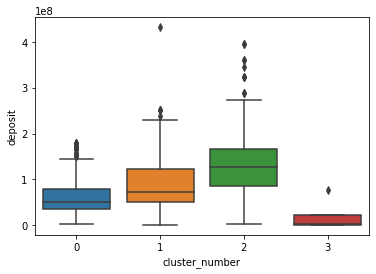

In [68]:
sns.boxplot(df_final['cluster_number'],df_final['deposit'])

- Deposit and monthly rent had a negative co-relation and based on the plot cluster 4 has least deposit.

### 9.5 Plot Boxplot between cluster label and "monthly_rent" and comment on the result

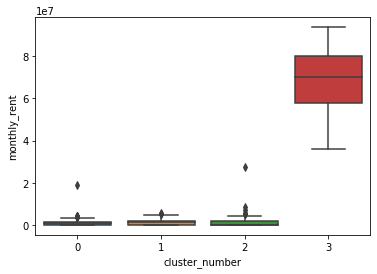

In [69]:
sns.boxplot(df_final['cluster_number'],df_final['monthly_rent'])

- As stated earlier cluster 4 has least deposit but now by seeing we can infer it also has very high monthly rent.

### 9.6 Plot Boxplot between cluster label and "unit_area" and comment on the result

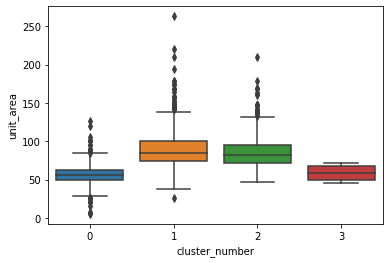

In [70]:
sns.boxplot(df_final['cluster_number'],df_final['unit_area'])

### 9.7 Plot Boxplot between cluster label and "property_age" and comment on the result

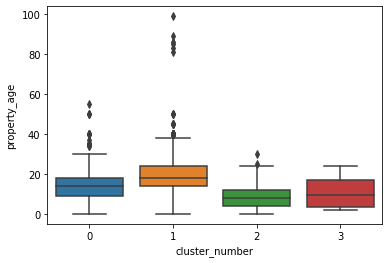

In [71]:
sns.boxplot(df_final['cluster_number'],df_final['property_age'])

- 'Property Age' and 'unit_area' are not much of help in differentiating one cluster from other.

## 10. Conclusion and Interpretation

- We can infer that the data itself does not contains any natural cluster in the dataset.
- This is why we are also getting a very low silhouette score for even the best clusters.
- Dataset contains variable data and data which can not be easily classified using clusters.
- Cluster 4 which is formed here only contains values which are outlier for each specufic column.